In [1]:
import os
import numpy as np
import matplotlib.pyplot as plot
from pathlib import Path
import folium
from folium import plugins
import mapclassify
import geopandas as gpd
import pandas as pd
import glob 
import plotly.graph_objects as go
import fiona

In [2]:
#Get the current working directory
#os.chdir("..") Used only fto go down one directory
os.getcwd()

'/Users/josele/Library/CloudStorage/GoogleDrive-ejdvc757@gmail.com/Other computers/My MacBook Pro/PhD/HG_SWOT/Hypsometry/Hypsometry_project'

In [3]:
#List all the shapefiles in the directory and split them into nodes and reaches
shpNd = glob.glob('SWOT_L2_HR_RiverSP/**/*Node*.shp', recursive=True) #Nodes
shpRch = glob.glob('SWOT_L2_HR_RiverSP/**/*Reach*.shp', recursive=True) #Reaches
shpNd,shpRch

(['SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_010_022_NA_20240125T182836_20240125T182847_PIC0_01/SWOT_L2_HR_RiverSP_Node_010_022_NA_20240125T182836_20240125T182847_PIC0_01.shp',
  'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_009_535_SA_20240123T054824_20240123T054826_PIC0_01/SWOT_L2_HR_RiverSP_Node_009_535_SA_20240123T054824_20240123T054826_PIC0_01.shp',
  'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_007_022_NA_20231124T041320_20231124T041331_PIC0_01/SWOT_L2_HR_RiverSP_Node_007_022_NA_20231124T041320_20231124T041331_PIC0_01.shp',
  'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_011_022_NA_20240215T151341_20240215T151352_PIC0_01/SWOT_L2_HR_RiverSP_Node_011_022_NA_20240215T151341_20240215T151352_PIC0_01.shp',
  'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_010_535_SA_20240213T023329_20240213T023331_PIC0_01/SWOT_L2_HR_RiverSP_Node_010_535_SA_20240213T023329_20240213T023331_PIC0_01.shp',
  'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_008_535_SA_20240102T090319_20240102T090321_PIC0_01/SWOT_L2_HR_Ri

In [4]:
shpNd_022_NA = glob.glob('SWOT_L2_HR_RiverSP/**/*Node*_022_NA*.shp', recursive=True) #Nodes
shpNd_022_NA

['SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_010_022_NA_20240125T182836_20240125T182847_PIC0_01/SWOT_L2_HR_RiverSP_Node_010_022_NA_20240125T182836_20240125T182847_PIC0_01.shp',
 'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_007_022_NA_20231124T041320_20231124T041331_PIC0_01/SWOT_L2_HR_RiverSP_Node_007_022_NA_20231124T041320_20231124T041331_PIC0_01.shp',
 'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_011_022_NA_20240215T151341_20240215T151352_PIC0_01/SWOT_L2_HR_RiverSP_Node_011_022_NA_20240215T151341_20240215T151352_PIC0_01.shp',
 'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_009_022_NA_20240104T214331_20240104T214342_PIC0_01/SWOT_L2_HR_RiverSP_Node_009_022_NA_20240104T214331_20240104T214342_PIC0_01.shp',
 'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_008_022_NA_20231215T005824_20231215T005835_PIC0_01/SWOT_L2_HR_RiverSP_Node_008_022_NA_20231215T005824_20231215T005835_PIC0_01.shp']

In [5]:
geodataframes = []
for i in range(len(shpNd_022_NA)):
   geodataframes.append(gpd.read_file(shpNd_022_NA[i]))

In [6]:
subsetted_dataframes = []

# Loop over the list of dataframes
for dataframe in geodataframes:

    # Subset the dataframe to the desired columns and append to the list
    subsetted_dataframes.append(dataframe[['node_id', 'time_str','lat', 'lon', 'river_name', 'wse', 'width']])

In [7]:
result_df_list = []

# Number of rows in each dataframe (assuming they all have the same number of rows)
num_rows = len(subsetted_dataframes[0])

# Iterate over each row index
for i in range(num_rows):
    # Create a list to store data from each dataframe for the current row
    row_data = []
    # Iterate over each dataframe and extract the row data
    for df in subsetted_dataframes:
        row_data.append(df.iloc[i])
    # Concatenate the row data into a single dataframe and append it to the result list
    result_df_list.append(pd.concat(row_data, axis=1).T)


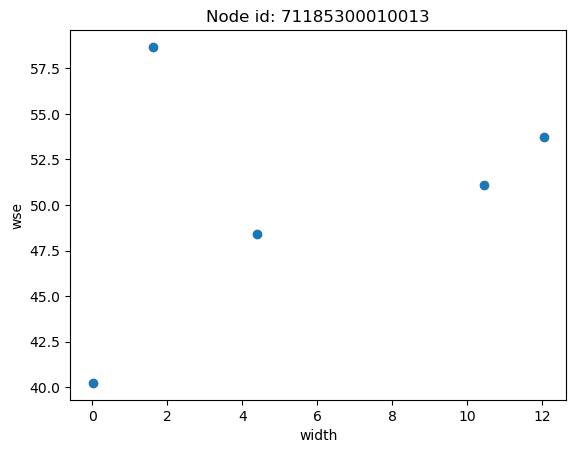

In [8]:
# Function to plot scatter plot from a given dataframe
def plot_scatter(dfa):
    plot.scatter(dfa['width'], dfa['wse'])
    plot.xlabel('width')
    plot.ylabel('wse')
    plot.title('Node id: ' + df['node_id'].iloc[0])
    plot.show()

# Select the index of the dataframe you want to plot
df_index = 34020
#34020
#33978
#34041
# Plot scatter plot for the selected dataframe
plot_scatter(result_df_list[df_index])

In [9]:
result_df_list[34020]

,node_id,time_str,lat,lon,river_name,wse,width
34020,75163000170171,2024-01-25T18:36:29Z,30.421002,-96.284567,Brazos River,58.66972,1.613588
34020,75163000170171,2023-11-24T04:21:13Z,30.421563,-96.285164,Brazos River,40.24127,0.012488
34020,75163000170171,2024-02-15T15:21:34Z,30.420454,-96.285189,Brazos River,53.74517,12.034859
34020,75163000170171,2024-01-04T21:51:23Z,30.420605,-96.284854,Brazos River,51.11697,10.441105
34020,75163000170171,2023-12-15T01:06:16Z,30.420665,-96.284826,Brazos River,48.41222,4.395453


In [ ]:
print(94/382.90, 93/382.73, 95/382.63)

In [ ]:
frames={}
for i in range(len(shpNd_022_NA)):
        frames[i] = pd.concat([gpd.read_file(shpNd_022_NA[i]).get('node_id'), gpd.read_file(shpNd_022_NA[i]).get('river_name'), gpd.read_file(shpNd_022_NA[i]).get('lat'), 
        gpd.read_file(shpNd_022_NA[i]).get('lon'), gpd.read_file(shpNd_022_NA[i]).get('wse'), gpd.read_file(shpNd_022_NA[i]).get('width')], axis=1)
   

In [ ]:
frames[1]

In [ ]:
first_rows = [frames.iloc[0] for frames in frames]

In [ ]:
#Read the shapefile. [0] is used to read the first shapefile in the list
gpd.read_file(shpNd[1]).head()

In [ ]:
m = gpd.read_file(shpNd[0]).explore('wse', cmap='viridis', legend=True)
m

In [ ]:
SWOT_HR_shp1 = gpd.read_file(shpNd[0])[['river_name','p_wse','p_width','geometry']]
SWOT_HR_shp1 =SWOT_HR_shp1.rename(columns={'river_name': 'River Name','p_wse':'Water Surface Elevation','p_width':'River Width'})
SWOT_HR_shp1.head()

In [ ]:
L = SWOT_HR_shp1
updated_m = L.explore(column='Water Surface Elevation', cmap='viridis', legend=True)

updated_m

In [ ]:
L.crs 

In [ ]:
files = glob.glob("**/*")
files

In [ ]:
shapes =   glob.glob(os.path.join('SWOT_L2_HR_RiverSP','*','*.shp'))
list_of_dfs = []
for f in shapes:
    df = gpd.read_file(f)
    list_of_dfs.append(df)

list_of_dfs[0]

In [ ]:
list_of_dfs[1]